# Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

In [31]:
from matplotlib.backends.backend_pdf import PdfPages

## load data

In [2]:
def load_data(file_pairs,src_dir='',dst_dir='.'):
    import os
    if not os.path.isdir(dst_dir):
        os.mkdir(dst_dir)
    for file_pair in file_pairs:
        src = os.path.abspath(os.path.expanduser(os.path.join(src_dir,file_pair[0])))
        dst = os.path.expanduser(os.path.join(dst_dir,file_pair[1]))
        if os.path.isfile(dst):
            os.remove(dst)
        if not os.path.islink(dst):
            os.symlink(src,dst)

def load_data_suffixes(file_pairs, src_dir='', dst_dir='.', suffixes=None):
    import os
    if not os.path.isdir(dst_dir):
        os.mkdir(dst_dir)
    if not suffixes:
        for file_pair in file_pairs:
            src = os.path.abspath(os.path.expanduser(os.path.join(src_dir, file_pair[0])))
            dst = os.path.expanduser(os.path.join(dst_dir, file_pair[1]))
            if os.path.isfile(dst):
                os.remove(dst)
            if not os.path.islink(dst):
                os.symlink(src, dst)
    else:
        for file_pair in file_pairs:
            for suffix_pair in suffixes:
                src = os.path.abspath(os.path.expanduser(
                    os.path.join(src_dir, file_pair[0] + suffix_pair[0])))
                dst = os.path.expanduser(
                    os.path.join(dst_dir, file_pair[1] + suffix_pair[1]))
                if os.path.isfile(dst):
                    os.remove(dst)
                if not os.path.islink(dst):
                    os.symlink(src, dst)

## stack bar plot

In [135]:
def stack_percentage_bar(results, horizontal=False, annotate='number'):
    import sys
    """\
    results : pandas.DataFrame
        results.index is the name of each sample.
        results.columns is the label of each category
    horizontal: bool
        If the figure should be horizontal.
    """
    # the following modules should been loaded before
    #import numpy as np
    #import matplotlib as mpl
    #mpl.rcParams['pdf.fonttype'] = 42
    #mpl.rcParams['ps.fonttype'] = 42
    #mpl.rcParams['font.sans-serif'] = 'Helvetica'
    #import matplotlib.pyplot as plt
    #import seaborn as sns
    percentage = results.div(results.sum(axis=1), axis=0) * 100
    percentage_cum = percentage.cumsum(axis=1)
    percentage_cum.loc[:, percentage_cum.shape[1] - 1] = 100.0
    category_colors = plt.get_cmap(my_cmap_3)(np.linspace(
        0.15, 0.85, results.shape[1]))
    if horizontal:
        fig, ax = plt.subplots(figsize=(6.4 * .75, 4.8))
        ax.invert_yaxis()
        ax.set_xlim(0, 100)
        for i, (category_name,
                color) in enumerate(zip(results.columns, category_colors)):
            widths = percentage.iloc[:, i]
            starts = percentage_cum.iloc[:, i] - widths
            ax.barh(results.index,
                    widths,
                    left=starts,
                    height=0.5,
                    label=category_name,
                    color=color)
            xcenters = starts + widths / 2
            r, g, b, _ = color
            text_color = 'white' if r * g * b < 0.33 else (
                'grey' if r * g * b < 0.66 else 'black')
            if annotate == 'number':
                text = [f'{x:d}' for x in results.iloc[:, i]]
            elif annotate == 'percentage':
                text = [f'{x/100:.2%}' for x in percentage.iloc[:, i]]
            else:
                sys.stdout.write(
                    f'Invalide annotate input: {annotate}. Use default parameters number.'
                )
                text = [f'{x:d}' for x in results.iloc[:, i]]
            for y, (x, c) in enumerate(zip(xcenters, text)):
                ax.text(x, y, c, ha='center', va='center', color=text_color)
        ax.set_xticks(np.arange(0, 120, 20))
        ax.set_xticklabels(np.arange(0, 120, 20))
        ax.set_xlabel('Percentage')
        ax.set_yticks(np.arange(percentage.shape[0]))
        ax.set_yticklabels(percentage.index)
        ax.set_ylabel('Sample')
        ax.legend(ncol=results.shape[1],
                  bbox_to_anchor=(0, 1),
                  loc='lower left',
                  fontsize='small')
    else:
        fig, ax = plt.subplots(figsize=(6.4 * .75, 4.8))
        ax.set_ylim(0, 100)
        for i, (category_name,
                color) in enumerate(zip(results.columns, category_colors)):
            hights = percentage.iloc[:, i]
            starts = percentage_cum.iloc[:, i] - hights
            ax.bar(results.index,
                   hights,
                   bottom=starts,
                   width=0.5,
                   label=category_name,
                   color=color)
            xcenters = starts + hights / 2
            r, g, b, _ = color
            text_color = 'white' if r * g * b < 0.33 else (
                'grey' if r * g * b < 0.66 else 'black')
            if annotate == 'number':
                text = [f'{x:d}' for x in results.iloc[:, i]]
            elif annotate == 'percentage':
                text = [f'{x/100:.2%}' for x in percentage.iloc[:, i]]
            else:
                sys.stdout.write(
                    f'Invalide annotate input: {annotate}. Use default parameters number.'
                )
                text = [f'{x:d}' for x in results.iloc[:, i]]
            for x, (c, y) in enumerate(zip(text, xcenters)):
                ax.text(x, y, c, ha='center', va='center', color=text_color)
        ax.set_xticks(np.arange(results.shape[0]))
        ax.set_xticklabels(percentage.index, rotation=45, ha='right')
        ax.set_xlabel('Sample')
        ax.set_yticks(np.arange(0, 120, 20))
        ax.set_yticklabels(np.arange(0, 120, 20))
        ax.set_ylabel('Percentage')
        ax.legend(bbox_to_anchor=(1, 0), loc='lower left')
    return fig, ax

## make_Ramp function

In [216]:
from colour import Color
from matplotlib.colors import LinearSegmentedColormap
def make_Ramp( ramp_colors ): 
    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    plt.figure( figsize = (15,3))
    plt.imshow( [list(np.arange(0, len( ramp_colors ) , 0.1)) ] , interpolation='nearest', origin='lower', cmap= color_ramp )
    plt.xticks([])
    plt.yticks([])
    return color_ramp

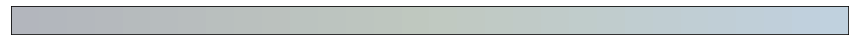

In [217]:
my_cmap_3 = make_Ramp(['#B3B6BD', '#C0C9C0', '#C0D1DF'])

# DESeq2 gene number

## read in DESeq2 results

In [4]:
import os
os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_2/analysis/RNAseq/expression_change')

In [7]:
deseq_res = {}
for stage in ['256', '1k', 'dome'] :
    deseq_res[stage] = pd.read_csv(f'deseq2_res_{stage}.tsv', sep = '\t')

In [8]:
deseq_res['dome'].head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSDARG00000096573.1,0.000000,NaN,NaN,NaN,NaN,NaN
ENSDARG00000100782.2,3.900659,0.466719,2.726393,0.171185,0.864078,NaN
ENSDARG00000034862.5,0.000000,NaN,NaN,NaN,NaN,NaN
ENSDARG00000075827.6,0.732448,-2.439872,4.258619,-0.572926,0.566695,NaN
ENSDARG00000088581.4,29.869232,-1.002833,0.705813,-1.420820,0.155369,NaN


In [28]:
for stage in ['256', '1k', 'dome'] :
    print(stage, deseq_res[stage]['log2FoldChange'].loc[deseq_res[stage]['padj']<0.1].max(), deseq_res[stage]['log2FoldChange'].loc[deseq_res[stage]['padj']<0.1].min())

256 25.032916644251298 -7.932289516482049
1k 1.08899573009247 -1.34159734630444
dome 3.31357353337586 -14.1327436209542


In [22]:
gene_num_lfc = pd.DataFrame()
stage_ls = []
lfc_ls = []
gene_num = []
for stage in ['256', '1k', 'dome'] :
    for lfc in [0,1,2,5,10] :
        stage_ls.append(stage)
        gene_num.append(deseq_res[stage].loc[~deseq_res[stage]['log2FoldChange'].isna()].loc[(deseq_res[stage]['log2FoldChange'] >=lfc) | (deseq_res[stage]['log2FoldChange'] <=-lfc) ].loc[deseq_res[stage]['padj']<0.1].shape[0])
        lfc_ls.append(lfc)
        
gene_num_lfc['stage'] = stage_ls
gene_num_lfc['gene_num'] = gene_num
gene_num_lfc['lfc'] = lfc_ls
gene_num_lfc

,stage,gene_num,lfc
0,256,411,0
1,256,173,1
2,256,93,2
3,256,46,5
4,256,1,10
5,1k,903,0
6,1k,4,1
7,1k,0,2
8,1k,0,5
9,1k,0,10


## intersect with important genes

### target genes

In [677]:
%%bash
cd ~/fitCUTRUN/revision_2/analysis/RNAseq/diff_expr_genes
# ln -s ~/fitCUTRUN/revision_1/analysis/TF/gen_sup_tables/*target* .

In [678]:
os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_2/analysis/RNAseq/diff_expr_genes')

In [679]:
target_genes = {}
for stage in ['pre_MBT', 'MBT', 'post_MBT'] :
    target_genes[stage] = pd.read_csv(f'nanot_{stage}_target.csv', header=0)
    

In [680]:
target_genes['post_MBT'].head()

,Gene,first-wave transcribed genes,early ZGA genes,"down-regulated in nanog MO 4hpf (Lee, et al. 2013 Nature)","down-regulated in nanog MO 6hpf (Lee, et al. 2013 Nature)"
0,ENSDARG00000086405,False,False,False,False
1,ENSDARG00000034896,False,False,False,False
2,ENSDARG00000089913,False,False,False,False
3,ENSDARG00000019498,False,False,False,False
4,ENSDARG00000077850,False,False,False,False


In [681]:
deseq_target_df = {}

for stage in ['256', '1k', 'dome'] :
    deseq_target_df[stage] = pd.DataFrame()
    deseq_target_df[stage] = deseq_res[stage]
    deseq_target_df[stage][['Gene', 'last']] = deseq_res[stage].index.str.split('.', expand=True).tolist()
    stage_target_ls = ['pre_MBT' if x in target_genes['pre_MBT']['Gene'].tolist() else 'MBT' if x in target_genes['MBT']['Gene'].tolist() else 'post_MBT' if x in target_genes['post_MBT']['Gene'].tolist() else 'non-target' for x in deseq_target_df[stage]['Gene']]
    deseq_target_df[stage]['stage_DE'] = stage
    deseq_target_df[stage]['stage_target'] = stage_target_ls    
    deseq_target_df[stage] = deseq_target_df[stage].reset_index()
    ifDE_ls = ['up' if x > 0.58 and y < 0.05 else 'down' if x < -0.58 and y < 0.05  else 'unchanged' for (x,y) in zip(deseq_target_df[stage]['log2FoldChange'],deseq_target_df[stage]['padj'])]
    deseq_target_df[stage]['ifDE'] = ifDE_ls

deseq_target_df[stage]

,index,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,stage_DE,Gene,last,stage_target,ifDE
0,ENSDARG00000096573.1,0.000000,NaN,NaN,NaN,NaN,NaN,dome,ENSDARG00000096573,1,non-target,unchanged
1,ENSDARG00000100782.2,3.900659,0.466719,2.726393,0.171185,0.864078,NaN,dome,ENSDARG00000100782,2,non-target,unchanged
2,ENSDARG00000034862.5,0.000000,NaN,NaN,NaN,NaN,NaN,dome,ENSDARG00000034862,5,non-target,unchanged
3,ENSDARG00000075827.6,0.732448,-2.439872,4.258619,-0.572926,0.566695,NaN,dome,ENSDARG00000075827,6,non-target,unchanged
4,ENSDARG00000088581.4,29.869232,-1.002833,0.705813,-1.420820,0.155369,NaN,dome,ENSDARG00000088581,4,non-target,unchanged
...,...,...,...,...,...,...,...,...,...,...,...,...
32031,ENSDARG00000007018.10,4.900652,6.407945,2.362969,2.711819,0.006692,NaN,dome,ENSDARG00000007018,10,non-target,unchanged
32032,ENSDARG00000095695.6,1.808709,1.536798,3.913628,0.392679,0.694557,NaN,dome,ENSDARG00000095695,6,non-target,unchanged
32033,ENSDARG00000097527.2,0.000000,NaN,NaN,NaN,NaN,NaN,dome,ENSDARG00000097527,2,non-target,unchanged
32034,ENSDARG00000099824.2,2.226894,-4.029065,4.223612,-0.953938,0.340115,NaN,dome,ENSDARG00000099824,2,non-target,unchanged


In [633]:
deseq_target_df[stage]['stage_DE'][32034]

'dome'

#### DE gene symbol

In [649]:
de_gene_symbol = {}
for stage in ['256', '1k', 'dome'] :
    de_gene_symbol[stage] = pd.DataFrame()
    
    for stage1 in ['pre_MBT', 'MBT', 'post_MBT'] :
        de_gene_id_up = deseq_target_df[stage].loc[(deseq_target_df[stage]['ifDE'] == 'up') & (deseq_target_df[stage]['stage_target'] == stage1)]['index']
        up = ','.join(tr_gene_symbol_pd.loc[tr_gene_symbol_pd['gene_id'].isin(de_gene_id_up)]['gene_symbol'].unique().tolist())
        de_gene_id_down = deseq_target_df[stage].loc[(deseq_target_df[stage]['ifDE'] == 'down') & (deseq_target_df[stage]['stage_target'] == stage1)]['index']
        down = ','.join(tr_gene_symbol_pd.loc[tr_gene_symbol_pd['gene_id'].isin(de_gene_id_down)]['gene_symbol'].unique().tolist())
        de_gene_symbol[stage][stage1] = [up, down]
        
    de_gene_symbol[stage].index = ['up', 'down']
    de_gene_symbol[stage].to_csv(f'/mnt/Storage/home/wangyiman/fitCUTRUN/revision_2/analysis/RNAseq/diff_expr_genes/diff_gene_symbol_{stage}.csv')

In [650]:
de_gene_symbol[stage]

,pre_MBT,MBT,post_MBT
up,"RF00002,slc12a2,pik3ap1,slc25a43,si:ch211-197h...","smox,becn1,rnaset2,si:ch211-209l18.4,znf1138","prkx,dclk2a,shisa4,dnph1,zgc:163030,spink2.1,g..."
down,"ccdc191,dgkh,si:dkey-199k11.6","zgc:111868,gfra4a,BX530721.1,nrxn2a,CR792441.1...","fn1b,ctnna2,ascc3,mapkbp1,znfl1h,azin1b,dnah12..."


####  MBT DE gene number -- Fig.S5G

In [682]:
target_DE_num = {}
for stage in ['256', '1k', 'dome'] :
    target_DE_num[stage] = deseq_target_df[stage][["stage_target", "ifDE", "Gene"]].groupby(["stage_target", "ifDE"]).count().reset_index().pivot(index='stage_target', columns='ifDE')
    target_DE_num[stage].columns.name = None
    target_DE_num[stage].index.name = None
    target_DE_num[stage] = target_DE_num[stage]['Gene'][['up', 'down', 'unchanged']]
    target_DE_num[stage] = target_DE_num[stage].reindex(["pre_MBT", "MBT", "post_MBT", "non-target"])
    

In [683]:
target_DE_num['256'].fillna(0)[target_DE_num['256'].columns].astype(int)

ifDE,up,down,unchanged
pre_MBT,3,1,1313
MBT,9,6,1876
post_MBT,9,10,4028
non-target,45,87,24649


In [684]:
target_DE_num['1k'].fillna(0)[target_DE_num['1k'].columns].astype(int)

ifDE,up,down,unchanged
pre_MBT,0,0,1317
MBT,0,1,1890
post_MBT,0,0,4047
non-target,2,2,24777


In [685]:
target_DE_num['dome'].fillna(0)[target_DE_num['dome'].columns].astype(int)

ifDE,up,down,unchanged
pre_MBT,9,2,1306
MBT,5,6,1880
post_MBT,25,11,4011
non-target,94,53,24634


### Nanog

In [219]:
finame = '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.genePredExt'
tr_gene_pd = pd.read_table(finame, header=None, sep="\t", encoding="utf-8")
tr_gene_pd = tr_gene_pd.iloc[:,[0,11]]
tr_gene_pd.columns = ['transcript_id', 'gene_id']
finame = '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11.ensGeneToGeneSymbol.txt'
gene_symbol_pd = pd.read_table(finame, header=None, sep="\t", encoding="utf-8")
gene_symbol_pd.columns = ['gene_id', 'gene_symbol']
tr_gene_symbol_pd = pd.merge(tr_gene_pd, gene_symbol_pd, on="gene_id")


In [221]:
tr_gene_symbol_pd.loc[tr_gene_symbol_pd['gene_symbol'] == 'nanog']

,transcript_id,gene_id,gene_symbol
36081,ENSDART00000114762.3,ENSDARG00000075113.3,nanog


In [224]:
for stage in ['256', '1k', 'dome'] :
    print(stage, deseq_res[stage][['log2FoldChange', 'padj']].loc[deseq_res[stage].index == 'ENSDARG00000075113.3'])

256                       log2FoldChange      padj
ENSDARG00000075113.3          0.1833  0.192692
1k                       log2FoldChange          padj
ENSDARG00000075113.3        0.176916  1.260694e-07
dome                       log2FoldChange      padj
ENSDARG00000075113.3        0.218572  0.015429


### CRISPR genes

ENSDART00000142121.3
ENSDART00000060018.8
ENSDART00000010813.9
ENSDART00000010813.9
ENSDART00000175126.2
ENSDART00000100286.4
ENSDART00000064701.6

In [654]:
crispr_gene_id = tr_gene_symbol_pd.loc[tr_gene_symbol_pd['transcript_id'].isin(['ENSDART00000060018.8',
                                                               'ENSDART00000010813.9',
                                                               'ENSDART00000010813.9',
                                                               'ENSDART00000175126.2',
                                                               'ENSDART00000100286.4',
                                                               'ENSDART00000087894.5'])]['gene_id']

In [655]:
tr_gene_symbol_pd.loc[tr_gene_symbol_pd['transcript_id'].isin(['ENSDART00000060018.8',
                                                               'ENSDART00000010813.9',
                                                               'ENSDART00000010813.9',
                                                               'ENSDART00000175126.2',
                                                               'ENSDART00000100286.4',
                                                               'ENSDART00000087894.5'])]

,transcript_id,gene_id,gene_symbol
14553,ENSDART00000060018.8,ENSDARG00000040955.8,dharma
21648,ENSDART00000010813.9,ENSDARG00000012788.9,foxa3
30901,ENSDART00000175126.2,ENSDARG00000069105.6,fgfr4
30902,ENSDART00000100286.4,ENSDARG00000069105.6,fgfr4
42908,ENSDART00000087894.5,ENSDARG00000061547.5,hist1h4l


In [656]:
crispr_gene_id

14553    ENSDARG00000040955.8
21648    ENSDARG00000012788.9
30901    ENSDARG00000069105.6
30902    ENSDARG00000069105.6
42908    ENSDARG00000061547.5
Name: gene_id, dtype: object

In [657]:
tr_gene_symbol_pd.loc[tr_gene_symbol_pd['gene_symbol']=='hist1h4l']

,transcript_id,gene_id,gene_symbol
42908,ENSDART00000087894.5,ENSDARG00000061547.5,hist1h4l


In [658]:
tr_gene_symbol_pd.loc[tr_gene_symbol_pd['gene_id'].isin(crispr_gene_id)]

,transcript_id,gene_id,gene_symbol
14553,ENSDART00000060018.8,ENSDARG00000040955.8,dharma
21648,ENSDART00000010813.9,ENSDARG00000012788.9,foxa3
30901,ENSDART00000175126.2,ENSDARG00000069105.6,fgfr4
30902,ENSDART00000100286.4,ENSDARG00000069105.6,fgfr4
30903,ENSDART00000192748.1,ENSDARG00000069105.6,fgfr4
42908,ENSDART00000087894.5,ENSDARG00000061547.5,hist1h4l


In [659]:
for stage in ['256', '1k', 'dome'] :
    print(stage, deseq_res[stage][['log2FoldChange', 'padj']].loc[deseq_res[stage].index.isin(crispr_gene_id)])

256                       log2FoldChange      padj
ENSDARG00000040955.8             NaN       NaN
ENSDARG00000012788.9             NaN       NaN
ENSDARG00000069105.6       -0.551000  0.964007
ENSDARG00000061547.5       -1.715031  0.493830
1k                       log2FoldChange  padj
ENSDARG00000040955.8       -0.075163   NaN
ENSDARG00000012788.9        2.732931   NaN
ENSDARG00000069105.6        1.651112   NaN
ENSDARG00000061547.5        0.926156   NaN
dome                       log2FoldChange      padj
ENSDARG00000040955.8        0.066388  0.926858
ENSDARG00000012788.9       -0.112974  0.742781
ENSDARG00000069105.6       -0.075044  0.741925
ENSDARG00000061547.5        0.062420  0.946251


# TPM

In [660]:
TPM = pd.read_csv('/mnt/Storage/home/wangyiman/fitCUTRUN/analysis/RNAseq/expression_change/expression_TPM.txt',sep='\t',index_col=0)
TPM.head()

,nanog_rFc_dome_rep4,nanog_rFc_dome_rep3,nanog_rFc_dome_rep2,nanog_rFc_dome_rep1,nanog_rFc_1k_rep4,nanog_rFc_1k_rep3,nanog_rFc_1k_rep2,nanog_rFc_1k_rep1,nanog_rFc_256_rep4,nanog_rFc_256_rep3,...,WT_1k_rep2,WT_1k_rep1,WT_256_rep2,WT_256_rep1,H2O_dome_rep2,H2O_dome_rep1,H2O_1k_rep2,H2O_1k_rep1,H2O_256_rep2,H2O_256_rep1
Gene,,,,,,,,,,,,,,,,,,,,,
ENSDARG00000000001.6,6.223261,8.715882,7.818923,8.550631,19.006306,18.242224,20.644146,22.109081,19.876320,21.774372,...,20.792608,21.579258,22.822485,21.894732,7.409885,7.705432,24.334187,22.774387,21.661764,20.425707
ENSDARG00000000002.8,0.675605,0.945779,0.502683,0.799011,2.502439,2.071920,1.901126,2.582455,2.156640,2.278447,...,2.249107,1.678241,2.691443,1.890009,0.777249,0.963047,1.801859,2.171537,2.924038,2.692474
ENSDARG00000000018.9,34.480312,36.733711,35.641384,40.667027,45.981537,40.414230,54.576992,59.143021,41.323509,46.686905,...,51.513348,45.011433,42.635017,42.545128,41.857334,41.316685,47.754395,3.663023,40.747528,41.905724
ENSDARG00000000019.9,154.777786,155.339264,143.536255,143.367126,145.237686,120.337090,144.609756,151.755722,136.600983,157.384705,...,140.728134,130.300766,137.677750,139.375961,152.041122,153.991150,143.403854,149.432770,138.216278,140.640060
ENSDARG00000000068.9,56.704876,56.978054,56.911804,61.318932,72.782738,76.995132,82.004967,79.553604,70.698074,84.167198,...,81.690994,78.508026,82.980888,82.093857,66.676231,61.194748,84.822021,84.962257,77.258591,81.280876


In [661]:
TPM_df = {}
TPM_df['256'] = TPM[['nanog_rFc_256_rep1', 'nanog_rFc_256_rep3', 'WT_256_rep1', 'WT_256_rep2', 'H2O_256_rep1', 'H2O_256_rep2']].T
TPM_df['256']['treat'] = ['treat', 'treat', 'control', 'control', 'control', 'control']
TPM_df['1k']  = TPM[['nanog_rFc_1k_rep3',  'nanog_rFc_1k_rep4',  'WT_1k_rep1',  'WT_1k_rep2',  'H2O_1k_rep1',  'H2O_1k_rep2']].T
TPM_df['1k']['treat']  = ['treat', 'treat', 'control', 'control', 'control', 'control']
TPM_df['dome']= TPM[['nanog_rFc_dome_rep1','nanog_rFc_dome_rep3','WT_dome_rep1','WT_dome_rep2','H2O_dome_rep1','H2O_dome_rep2']].T
TPM_df['dome']['treat']= ['treat', 'treat', 'control', 'control', 'control', 'control']


In [662]:
TPM_df['dome']

Gene,ENSDARG00000000001.6,ENSDARG00000000002.8,ENSDARG00000000018.9,ENSDARG00000000019.9,ENSDARG00000000068.9,ENSDARG00000000069.7,ENSDARG00000000086.12,ENSDARG00000000103.12,ENSDARG00000000142.10,ENSDARG00000000151.14,...,ENSDARG00000117819.1,ENSDARG00000117820.1,ENSDARG00000117821.1,ENSDARG00000117822.1,ENSDARG00000117823.1,ENSDARG00000117824.1,ENSDARG00000117825.1,ENSDARG00000117826.1,ENSDARG00000117827.1,treat
nanog_rFc_dome_rep1,8.550631,0.799011,40.667027,143.367126,61.318932,75.138290,61.625000,75.909889,8.112687,11.672527,...,0.0,1.531038,0.000000,0.0,0.0,3.834102,0.0,0.000000,0.000000,treat
nanog_rFc_dome_rep3,8.715882,0.945779,36.733711,155.339264,56.978054,89.841354,47.016281,52.065239,8.458599,10.382607,...,0.0,1.035892,0.933248,0.0,0.0,3.284220,0.0,0.550297,0.000000,treat
WT_dome_rep1,8.362440,0.903794,44.267162,158.429642,69.153000,86.563400,68.623497,66.843216,7.590631,11.469460,...,0.0,0.293966,1.526234,0.0,0.0,5.781584,0.0,0.000000,0.000000,control
WT_dome_rep2,8.885614,0.540513,39.640747,158.411469,67.997841,75.963898,61.117897,70.023720,9.499923,11.825912,...,0.0,1.227157,1.658760,0.0,0.0,6.065141,0.0,0.230664,0.107881,control
H2O_dome_rep1,7.705432,0.963047,41.316685,153.991150,61.194748,86.982468,64.506477,64.290695,9.385154,11.581221,...,0.0,0.688450,1.260585,0.0,0.0,5.266902,0.0,0.390468,0.000000,control
H2O_dome_rep2,7.409885,0.777249,41.857334,152.041122,66.676231,86.693298,70.830933,68.497627,8.206644,11.258479,...,0.0,0.000000,0.689843,0.0,0.0,5.577762,0.0,0.531466,0.000000,control


## Nanog & CRISPR genes 

In [663]:
tr_gene_symbol_pd.loc[tr_gene_symbol_pd['gene_id'].isin(crispr_gene_id)]

,transcript_id,gene_id,gene_symbol
14553,ENSDART00000060018.8,ENSDARG00000040955.8,dharma
21648,ENSDART00000010813.9,ENSDARG00000012788.9,foxa3
30901,ENSDART00000175126.2,ENSDARG00000069105.6,fgfr4
30902,ENSDART00000100286.4,ENSDARG00000069105.6,fgfr4
30903,ENSDART00000192748.1,ENSDARG00000069105.6,fgfr4
42908,ENSDART00000087894.5,ENSDARG00000061547.5,hist1h4l


In [664]:
TPM_df_melt = {}
for stage in ['256', '1k', 'dome'] :
    TPM_df_melt[stage] = TPM_df[stage].T.loc[(TPM_df[stage].columns == 'ENSDARG00000075113.3') | TPM_df[stage].columns.isin(crispr_gene_id)]
#     TPM_df_melt[stage]['Gene'] = tr_gene_symbol_pd.loc[tr_gene_symbol_pd['gene_id'].isin(TPM_df_melt[stage].index)]['gene_symbol'].unique()
    
    TPM_df_melt[stage]['gene_id'] = TPM_df_melt[stage].index
    TPM_df_melt[stage] = pd.merge(TPM_df_melt[stage], tr_gene_symbol_pd[['gene_id', 'gene_symbol']], on = 'gene_id', how='left').drop_duplicates()
    TPM_df_melt[stage] = pd.melt(TPM_df_melt[stage], id_vars=['gene_symbol'], value_vars=TPM_df_melt[stage].columns.tolist()[0:-2])
    TPM_df_melt[stage][['sample', 'rep']] = TPM_df_melt[stage]['variable'].str.split('_rep', expand=True)
    TPM_df_melt[stage]['log2(TPM+1)'] = [np.log2(x) for x in TPM_df_melt[stage]['value']+1]

In [665]:
TPM_df_melt[stage]

,gene_symbol,variable,value,sample,rep,log2(TPM+1)
0,foxa3,nanog_rFc_dome_rep1,93.1838,nanog_rFc_dome,1,6.557406
1,dharma,nanog_rFc_dome_rep1,18.877,nanog_rFc_dome,1,4.313030
2,hist1h4l,nanog_rFc_dome_rep1,11.6686,nanog_rFc_dome,1,3.663187
3,fgfr4,nanog_rFc_dome_rep1,86.1523,nanog_rFc_dome,1,6.445467
4,nanog,nanog_rFc_dome_rep1,1629.51,nanog_rFc_dome,1,10.671111
5,foxa3,nanog_rFc_dome_rep3,129.559,nanog_rFc_dome,3,7.028554
6,dharma,nanog_rFc_dome_rep3,15.2963,nanog_rFc_dome,3,4.026470
7,hist1h4l,nanog_rFc_dome_rep3,13.4145,nanog_rFc_dome,3,3.849449
8,fgfr4,nanog_rFc_dome_rep3,83.3841,nanog_rFc_dome,3,6.398899
9,nanog,nanog_rFc_dome_rep3,1475.07,nanog_rFc_dome,3,10.527550


### bar plot -- Fig.S5F

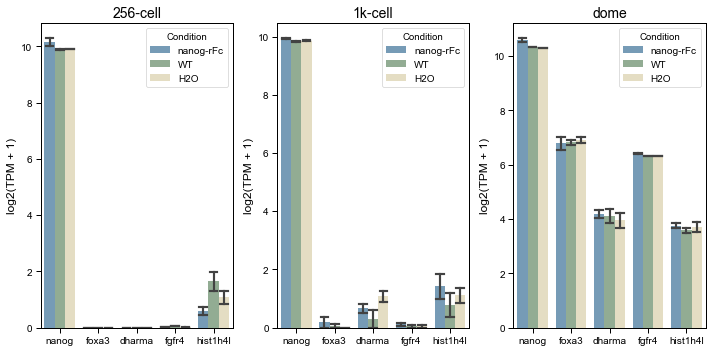

In [688]:
with sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10,
                             'font.size': 10.0
                         }):
    TPM_df_mean_log2 = {}
    fig, axes = plt.subplots(1,3,figsize=(10,5),tight_layout=True)
    
    i = 0
    for stage in ['256', '1k', 'dome'] :
        ax3 = axes[i]
        
        sns.barplot(
                    y='log2(TPM+1)',
                    x='gene_symbol',
                    data=TPM_df_melt[stage],
                    hue='sample',
                    order=['nanog', 'foxa3', 'dharma', 'fgfr4', 'hist1h4l'],
                    palette=['#E4DDC3', '#92AC93','#769BB6',][::-1], #'#98BDD8', '#BADEEA','#727F8D',],
                    ci='sd',
                    saturation=1,
                    capsize=.2,
                    ax=ax3,
                )
        
                
        ax3.set_ylabel('log2(TPM + 1)')
        ax3.set_xlabel('')
        
        title = stage if stage == 'dome' else stage + '-cell'
        ax3.set_title(title)
        
        h, l = ax3.get_legend_handles_labels()
        ax3.legend(h, ['nanog-rFc', 'WT', 'H2O'], title="Condition")
        
        i += 1
            
    fig.savefig('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_2/analysis/figures/Response_TPM_3stage_NanogCRISPR_DESeq2_log2.pdf',
                    transparent=True)

In [403]:
TPM_df_mean = {}
for stage in ['256', '1k', 'dome'] :
    TPM_df_mean[stage] = TPM_df[stage].groupby('treat').mean()